# Druzabne igre

Projekt pri Programiranje 1

Analiziral bom 1000 najbolj priljubljenih družabnih igrer na spletnem portalu [BGG](https://boardgamegeek.com/browse/boardgame?)

In [1]:
# naložimo paket
import pandas as pd

# naložimo razpredelnico, s katero bomo delali
igre = pd.read_csv('igre.csv', index_col = 'id')
kategorije = pd.read_csv('kategorije.csv', index_col = 'id')
nacini = pd.read_csv('nacin_igranja.csv', index_col = 'id')


# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 20 vrstic
pd.options.display.max_rows = 20

# uklopimo interaktivno risanje grafov
%matplotlib inline

In [2]:
#Pomozne funkcije
'''
po_imenu = igre['ime']
po_imenu

a = pd.merge(igre['ocena'], kategorije, on='id')
b = a.groupby('kategorija')
c = b.ocena.mean()
c.sort_values(ascending=False)

igre.groupby('maxplay').size().plot(kind='bar')
igre.groupby('minplay').size().plot(kind='bar')

'''

"\npo_imenu = igre['ime']\npo_imenu\n\na = pd.merge(igre['ocena'], kategorije, on='id')\nb = a.groupby('kategorija')\nc = b.ocena.mean()\nc.sort_values(ascending=False)\n\nigre.groupby('maxplay').size().plot(kind='bar')\nigre.groupby('minplay').size().plot(kind='bar')\n\n"

## Uvod
Pri analizi bom v prvi vrsti uporabljal sledeče podatke: identifikacijska številka igre, ime igre, leto izida, stevilo glasov, povprečno oceno, omejitve glede starosti in števila igralcev ter čas igranja. Za natančnejšo obravnano trendov bom upošteval še tematske kategorije in načine igranja posameznih iger. Pa si kar oglejmo glavno tabelo (urejeno po številu glasov):

In [3]:
igre

,ime,leto,minplay,maxplay,mintime,maxtime,minage,ocena,glasovi
id,,,,,,,,,
13,Catan,1995,3,4,60,120,10,7.17910,88579
822,Carcassonne,2000,2,5,30,45,8,7.42312,88383
30549,Pandemic,2008,2,4,45,45,8,7.62693,87254
68448,7 Wonders,2010,2,7,30,30,10,7.77183,72419
36218,Dominion,2008,2,4,30,30,13,7.63710,70461
...,...,...,...,...,...,...,...,...,...
943,Ligretto,1988,2,4,10,10,8,6.18856,3006
156858,Black Orchestra,2016,1,5,90,90,14,7.53424,3009
31105,Archaeology: The Card Game,2007,2,4,20,20,8,6.67640,3002


Preden zares začnemo z analizo si dodefinirajmo nekatere uporabne stolpce.

In [4]:
igre['avgplay'] = (igre.minplay + igre.maxplay) / 2
igre['avgtime'] = (igre.mintime + igre.maxtime) / 2
igre

,ime,leto,minplay,maxplay,mintime,maxtime,minage,ocena,glasovi,avgplay,avgtime
id,,,,,,,,,,,
13,Catan,1995,3,4,60,120,10,7.17910,88579,3.5,90.0
822,Carcassonne,2000,2,5,30,45,8,7.42312,88383,3.5,37.5
30549,Pandemic,2008,2,4,45,45,8,7.62693,87254,3.0,45.0
68448,7 Wonders,2010,2,7,30,30,10,7.77183,72419,4.5,30.0
36218,Dominion,2008,2,4,30,30,13,7.63710,70461,3.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...
943,Ligretto,1988,2,4,10,10,8,6.18856,3006,3.0,10.0
156858,Black Orchestra,2016,1,5,90,90,14,7.53424,3009,3.0,90.0
31105,Archaeology: The Card Game,2007,2,4,20,20,8,6.67640,3002,3.0,20.0


## Ocena v odvisnosti od leta in drugih dejavnikov
Ogeljmo si najprej kako leto izida vpliva na oceno. Da bodo rezultati bolj pregledni bomo ignorirali igre nastale pred letom 1980 saj ne predstavljajo niti enega procenta podatkov.

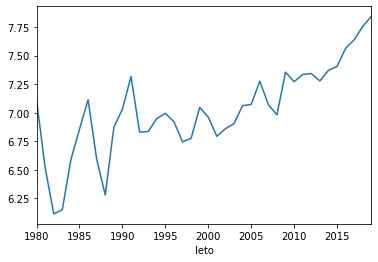

In [24]:
moderne_igre = igre[1980 <= igre.leto]
po_letih = moderne_igre.groupby('leto')
po_letih.ocena.mean().plot()

Opazimo da so ocene v osemdesetih kar poskakovale, na zacetku devetdesetih je prislo do velikega skoka, ki mu je sledil spust, od takrat naprej pa ocena vglavnem raste.

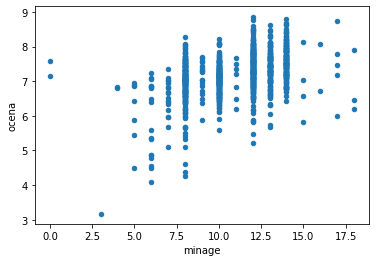

In [31]:
igre_norm = igre
igre_norm.plot.scatter('minage', 'ocena')
#Opazen trend, igre za starejse so vecinoma boljse

## Najbolj priljubljene teme
Na sploh in glede na starost.
Poglejmo zdaj ali so kateri nacini igranja ali teme bolj priljubnjeni pri igrah z daljšim povprečnim ifralnim časom, številom igralcev

In [38]:
#Za vsako temo, za vsako igro, ki ima to temo izracunamo koliko glasov ima, tako dobimo najbolj teme na sploh
kategorije_po_glasovih = pd.merge(kategorije, igre['glasovi'], on='id').groupby('kategorija').glasovi.sum()
kategorije_po_glasovih.sort_values(ascending=False)

kategorija
Card Game                       2855891
Fantasy                         1865807
Economic                        1659451
Fighting                        1581733
Science Fiction                 1148468
                                 ...   
Deck, Bag, and Pool Building       5098
Modular Board                      3906
Area Movement                      3906
American Revolutionary War         3335
Pike and Shot                      3026
Name: glasovi, Length: 93, dtype: int64

In [39]:
#Najbolj popularne kategorije
naj_kategorije = kategorije_po_glasovih.sort_values(ascending=False).head(10)
naj_kategorije

kategorija
Card Game             2855891
Fantasy               1865807
Economic              1659451
Fighting              1581733
Science Fiction       1148468
Medieval              1145100
City Building         1091206
Adventure              986000
Bluffing               920665
Territory Building     880090
Name: glasovi, dtype: int64

In [20]:
b = pd.merge(nacini, igre['glasovi'], on='id').groupby('nacin_igranja').glasovi.sum()
b.sort_values(ascending=False)

nacin_igranja
Hand Management                                4231263
Dice Rolling                                   2737205
Set Collection                                 2472803
Card Drafting                                  2328227
Variable Player Powers                         1785230
                                                ...   
Resource to Move                                  3479
Toc Toc Woodman: Golden Core and Bark Promo       3271
Click Clack Lumberjack Promo Cards                3271
Toc Toc Woodman: Golden Axe Expansion             3271
Movement Points                                   3217
Name: glasovi, Length: 148, dtype: int64

Zdaj ko smo ugotovili katere teme in kateri nacini igranja so najbolj priljubljeni, lahko za njih se analiziramo priljubljenost po starostnih skupinah.

Mogoce lahko za nacine igranja ugotovim povprečno trajanje igre. Povprečno starost igralca. Potem laho grafe za 10 najbolj priljubljenih? Popularnost v odvisnosti od starosti?

In [34]:
c = pd.merge(kategorije, igre['minage'], on='id').groupby('kategorija').minage.mean()
c.sort_values(ascending=False)

kategorija
Mature \/ Adult                  15.750000
Worker Placement                 14.000000
Action Queue                     14.000000
Simultaneous Action Selection    14.000000
Collectible Components           13.142857
                                   ...    
Memory                            7.333333
Action \/ Dexterity               7.000000
Children's Game                   6.080000
Music                             6.000000
Game System                       5.000000
Name: minage, Length: 93, dtype: float64